## Pytorch 적용

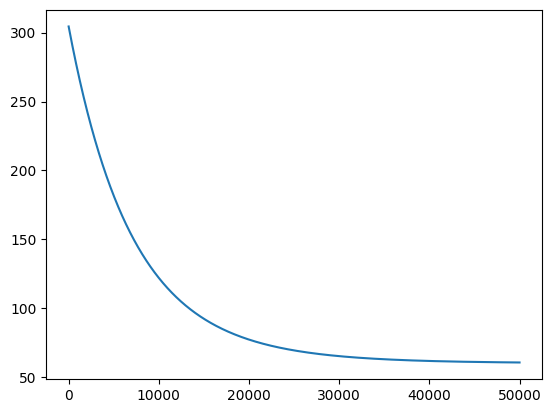

In [1]:
import torch
import matplotlib.pyplot as plt


device = torch.device('cpu')

N, Din, Dout = 64, 4, 2

x = torch.randn(N, Din, device=device)
y = torch.randn(N, Dout, device=device)
w = torch.randn(Din, Dout, device=device)

lr = 1e-6
loss_arr = []

for t in range(50000):
    # 5-1. 예측 값을 계산
    y_hat = x.mm(w)

    # 5-2. loss 계산
    loss = (0.5 * (y_hat - y) ** 2).sum()
    loss_arr.append(loss)

    # 5-3. 경사하강법 적용
    grad_y_hat = y_hat - y
    grad_w = x.T.mm(grad_y_hat)

    # 5-4. w를 갱신
    w -= lr * grad_w


plt.plot(loss_arr)

## autograd 적용

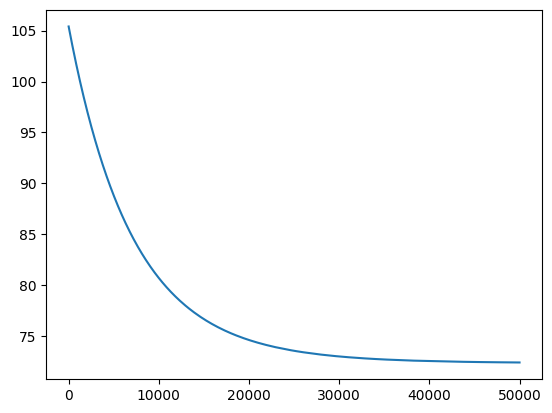

In [2]:
import torch
import matplotlib.pyplot as plt


device = torch.device('cpu')

N, Din, Dout = 64, 4, 2

x = torch.randn(N, Din, device=device)
y = torch.randn(N, Dout, device=device)
w = torch.randn(Din, Dout, device=device, requires_grad=True)

lr = 1e-6
loss_arr = []

for t in range(50000):
    # 5-1. 예측 값을 계산
    y_hat = x.mm(w)

    # 5-2. loss 계산
    loss = (0.5 * (y_hat - y) ** 2).sum()
    loss_arr.append(loss)

    # 5-3. 경사하강법 적용
    loss.backward()

    with torch.no_grad():
        w -= lr * w.grad
        w.grad.zero_()


plt.plot([loss.detach() for loss in loss_arr])

## nn library 사용

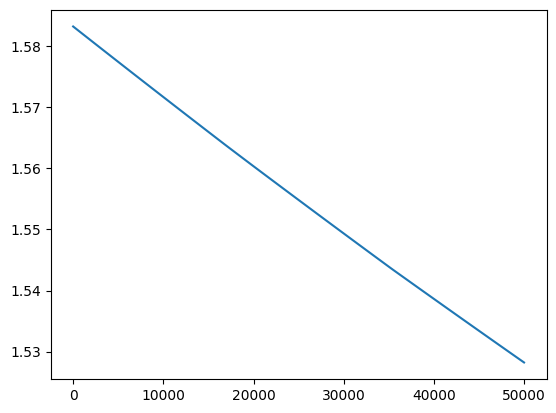

In [3]:
import torch
import matplotlib.pyplot as plt


device = torch.device('cpu')

N, Din, Dout = 64, 4, 2

x = torch.randn(N, Din, device=device)
y = torch.randn(N, Dout, device=device)

model = torch.nn.Sequential(
    torch.nn.Linear(Din, Dout),
)

lr = 1e-6
loss_arr = []

for t in range(50000):
    # 5-1. 예측 값을 계산
    y_hat = model(x)

    # 5-2. loss 계산
    loss = torch.nn.functional.mse_loss(y_hat, y)
    loss_arr.append(loss)

    # 5-3. 경사하강법 적용
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad
        model.zero_grad()

plt.plot([loss.cpu().detach() for loss in loss_arr])

## nn library 사용 (loss 값의 차이에 대한 주석추가)

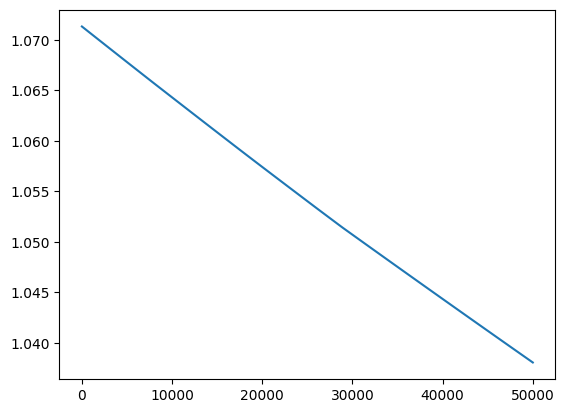

In [4]:
import torch
import matplotlib.pyplot as plt


device = torch.device('cpu')

N, Din, Dout = 64, 4, 2

x = torch.randn(N, Din, device=device)
y = torch.randn(N, Dout, device=device)

model = torch.nn.Sequential(
    torch.nn.Linear(Din, Dout),
)

lr = 1e-6
loss_arr = []

for t in range(50000):
    # 5-1. 예측 값을 계산
    y_hat = model(x)

    # 5-2. loss 계산
    # loss = 0.5*(y_hat - y).pow(2).sum()
    # loss = torch.nn.functional.mse_loss(y_hat, y, reduction='sum') * 0.5
    loss = torch.nn.functional.mse_loss(y_hat, y)
    loss_arr.append(loss)

    # 5-3. 경사하강법 적용
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad
        model.zero_grad()

plt.plot([loss.cpu().detach() for loss in loss_arr])

## Optimizer (Adam) 사용

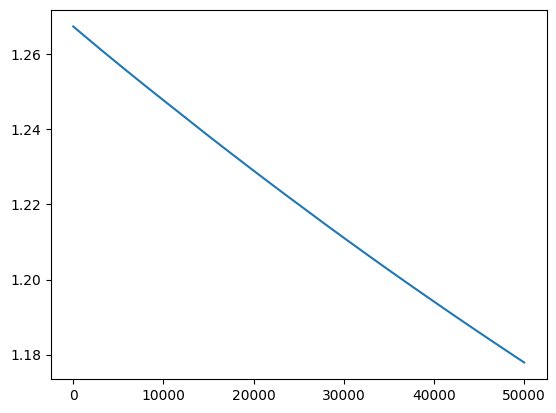

In [5]:
import torch
import matplotlib.pyplot as plt


device = torch.device('cpu')

N, Din, Dout = 64, 4, 2

x = torch.randn(N, Din, device=device)
y = torch.randn(N, Dout, device=device)

model = torch.nn.Sequential(
    torch.nn.Linear(Din, Dout),
)

lr = 1e-6

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_arr = []

for t in range(50000):
    # 5-1. 예측 값을 계산
    y_hat = model(x)

    # 5-2. loss 계산
    # loss = 0.5*(y_hat - y).pow(2).sum()
    # loss = torch.nn.functional.mse_loss(y_hat, y, reduction='sum') * 0.5
    loss = torch.nn.functional.mse_loss(y_hat, y)
    loss_arr.append(loss)

    # 5-3. 경사하강법 적용
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

plt.plot([loss.cpu().detach() for loss in loss_arr])

## nn.Module을 상속받아 Model을 class로 정의

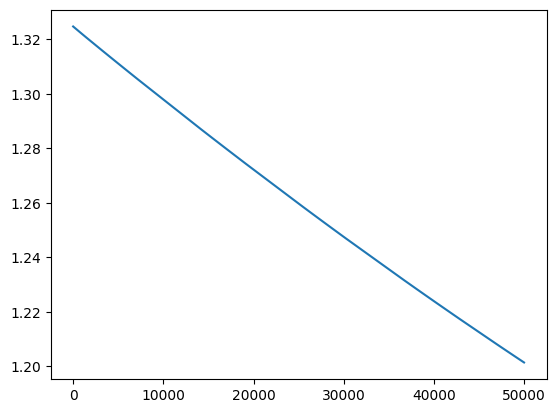

In [6]:
import torch
import matplotlib.pyplot as plt


device = torch.device('cpu')


class MyOneLayerNet(torch.nn.Module):
    def __init__(self, Din, Dout) -> None:
        super(MyOneLayerNet, self).__init__()
        self.linear = torch.nn.Linear(Din, Dout)

    def forward(self, x):
        y_hat = self.linear(x)
        return y_hat


N, Din, Dout = 64, 4, 2

x = torch.randn(N, Din, device=device)
y = torch.randn(N, Dout, device=device)

model = MyOneLayerNet(Din, Dout)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-6)

loss_arr = []

for t in range(50000):
    # 5-1. 예측 값을 계산
    y_hat = model(x)

    # 5-2. loss 계산
    loss = torch.nn.functional.mse_loss(y_hat, y)
    loss_arr.append(loss)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

plt.plot([loss.cpu().detach() for loss in loss_arr])